# Linear Regression

linear regression is a linear approach to modeling the relationship between a dependent variable and one or more independent variables.



\begin{equation*}
y =  \beta _{0} + x_{1}\beta _{1} +  x_{2}\beta _{2}
\end{equation*}

Here y is the depended variable and x<sub>1</sub> and x<sub>2</sub> are independent variables.

## Simple linear regression

Simple linear regression is a statistical method for obtaining a formula to predict
values of one variable from another where there is a causal relationship between the
two variables.

### Straight line formula
Central to simple linear regression is the formula for a straight line that is most
commonly represented as
y = mx + c

\begin{equation*}
y =  \beta _{0} + x_{1}\beta _{1}
\end{equation*}

In [74]:
import random
import time
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
from IPython.display import display, clear_output
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline


In [75]:
dataset = pd.read_csv('data/CarPrice_Assignment.csv')

In [76]:
print(dataset.shape)
dataset.describe()

(205, 26)


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [77]:
#dataset['horsepower']

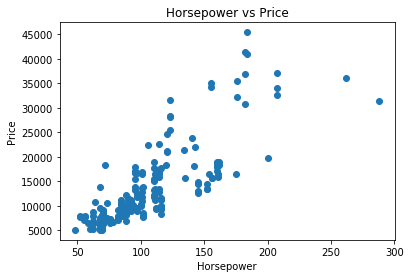

In [78]:
plt.scatter(dataset['horsepower'], dataset['price'])  
plt.title('Horsepower vs Price')  
plt.xlabel('Horsepower')  
plt.ylabel('Price')  
plt.show()

divide the data into independent variables and dependent variables.

In [79]:
X = dataset['horsepower'].values.reshape(-1,1)
y = dataset['price'].values.reshape(-1,1)

split 80% of the data to the training set while 20% of the data to test set using below code.

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

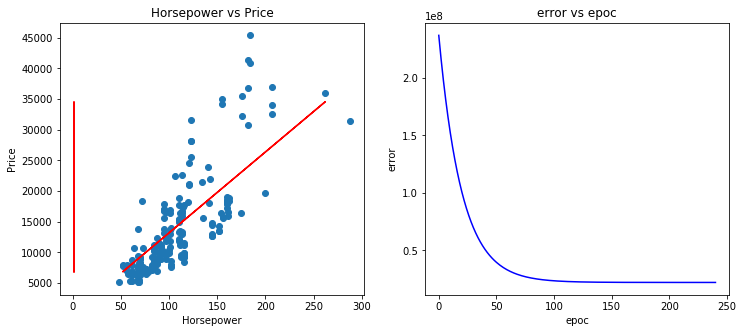

In [88]:
# 1. Assume starting values
n = len(X_train)
#print(n)
array_of_ones=np.ones(n)
X = np.append(array_of_ones.reshape((n,1)),np.array(X_train),axis=1)
y = np.array(y)
b = np.array([[0],[0]], dtype=np.double)



# 3. set learning rate and apoc

L = .000001  # The learning Rate
epochs = 250  # The number of iterations to perform gradient descent
error = []
for i in range(epochs): 
    # Compute loss

    y_pred = X.dot(b)

    mse = np.sum(np.square(y_train-y_pred))/n
    


    # update weight

    D_m = (-2/n) * np.sum(X * (y_train - y_pred))  # Derivative wrt m
    D_c = (-2/n) * np.sum(y_train - y_pred)  # Derivative wrt c
    b[0][0] = b[0][0] - L * D_c  # Update m
    b[1][0] = b[1][0] - L * D_m  # Update c
    error.append(mse)
    #print(mse,b[0][0],b[1][0],D_m,D_c)
    if i%10 == 0:
        fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,5))
        ax1.scatter(dataset['horsepower'], dataset['price'])  
        ax1.set_title('Horsepower vs Price')  
        ax1.set(xlabel='Horsepower', ylabel = 'Price') 
        ax1.plot(X,y_pred, color='red')
        #plt.pause(.05)

        ax2.set_title('error vs epoc')  
        ax2.set(xlabel='epoc', ylabel = 'error') 
        ax2.plot(error, color='blue')
        #plt.pause(.05)
        display(fig)
    
        clear_output(wait = True)
        plt.pause(0.01)

    


In [12]:
b[1][1]


IndexError: index 1 is out of bounds for axis 0 with size 1

In [17]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[-4053.15298046]
[[ 166.64923638]]


In [20]:
y_pred = regressor.predict(X_test)

In [21]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,6795.0,7278.995093
1,15750.0,21944.127894
2,15250.0,14278.263021
3,5151.0,3946.010366
4,9995.0,12611.770657
5,11199.0,15278.158439
6,5389.0,7278.995093
7,7898.0,6279.099675
8,17199.0,22610.724840
9,6529.0,8612.188984


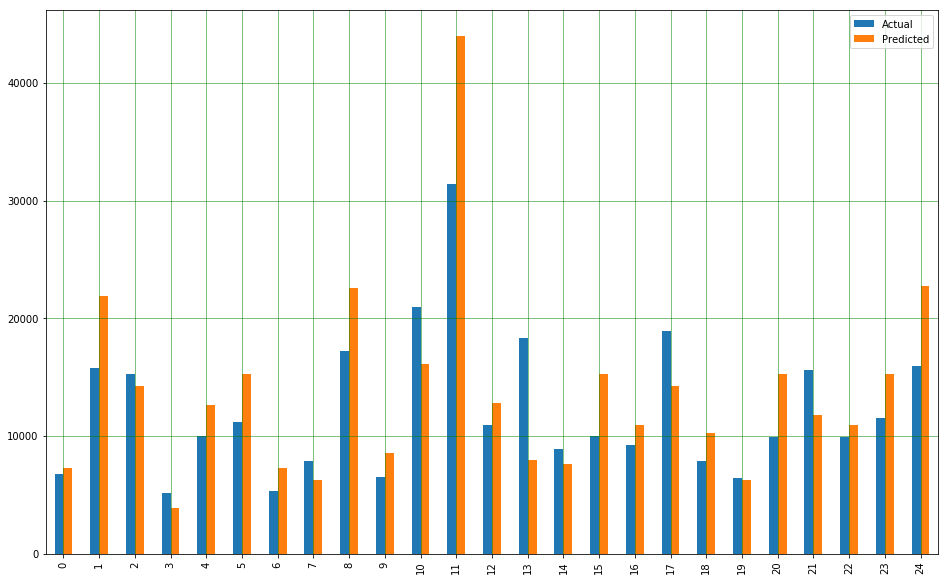

In [22]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

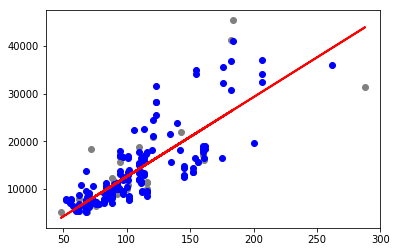

In [27]:
plt.scatter(X_test, y_test,  color='gray')
plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()